In [2]:
# Kjører funksjonen fra Oppgave_4, slik at vi kan bruke den i denne oppgaven
%run ./Oppgave_4.ipynb

filene ../data/ENOL_metar_data.json er lagret i dataframe for ENOL
filene ../data/ENBO_metar_data.json er lagret i dataframe for ENBO
Resultater for Ørland (ENOL):
Gjennomsnittlig vindretning: 182.3
Gjennomsnittlig vindhastighet: 11.8
Median vindretning: 140.0
Median vindhastighet: 11.0
Standardavvik vindretning: 93.3
Standardavvik vindhastighet: 7.1
Resultater for Bodø (ENBO):
Gjennomsnittlig vindretning: 158.2
Gjennomsnittlig vindhastighet: 13.6
Median vindretning: 110.0
Median vindhastighet: 12.0
Standardavvik vindretning: 89.6
Standardavvik vindhastighet: 7.4


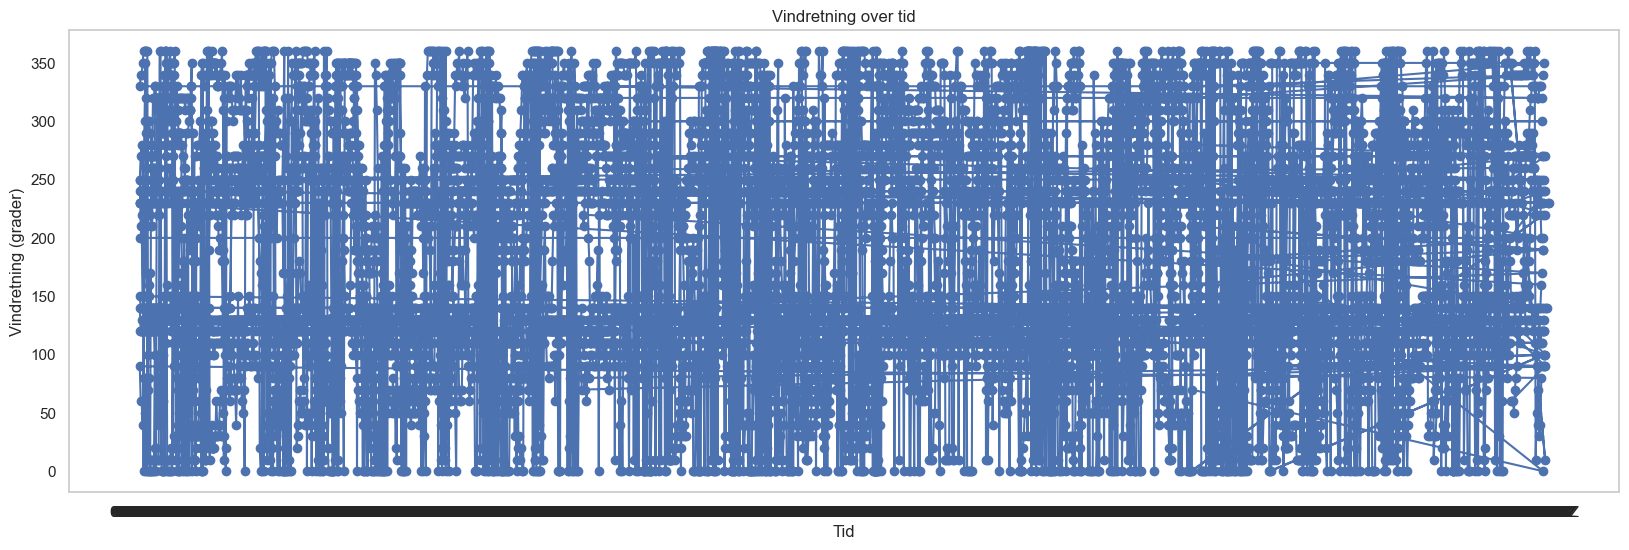

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(df_ENOL['Date/time'], df_ENOL['Wind_direction'], marker='o', linestyle='-', color='b')
plt.title('Vindretning over tid')
plt.xlabel('Tid')
plt.ylabel('Vindretning (grader)')
plt.grid()
plt.show()